ModuleNotFoundError: No module named 'spotipy'

In [6]:
pip install spotipy

  Using cached spotipy-2.16.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip list

Package                            Version            
---------------------------------- -------------------
alabaster                          0.7.12             
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.12             
anaconda-project                   0.8.3              
applaunchservices                  0.2.1              
appnope                            0.1.0              
appscript                          1.0.1              
argh                               0.26.2             
asn1crypto                         1.3.0              
astroid                            2.3.3              
astropy                            4.0                
atomicwrites                       1.3.0              
attrs                              19.3.0             
autopep8                           1.4.4              
Babel                              2.8.0              
backcall                           0.1.0              
backports.

Note: you may need to restart the kernel to use updated packages.


In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from pathlib import Path
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import json
import re 
import sys
import itertools

import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
#If you're not familiar with this, save it! Makes using jupyter notebook on laptops much easier
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
#another useful command to make data exploration easier
# NOTE: if you are using a massive dataset, this could slow down your code. 
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [6]:
client_id ='2ab55afd64cd4a9a86bb74e93a4f75f5'
client_secret ='20d4708024db41d6a193b4d03e08d55e'

In [7]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print("Usage: %s username" % (sys.argv[0],))
    sys.exit()

In [8]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [9]:
token = util.prompt_for_user_token(scope, client_id= client_id, client_secret=client_secret, redirect_uri='http://google.com/')

In [10]:
sp = spotipy.Spotify(auth=token)

In [11]:
#gather playlist names and images. 
#images aren't going to be used until I start building a UI
id_name = {}
list_photo = {}
for i in sp.current_user_playlists()['items']:

    id_name[i['name']] = i['uri'].split(':')[2]
    list_photo[i['uri'].split(':')[2]] = i['images'][0]['url']

In [12]:
id_name

{'Hindi': '0em8sYs398pAUg5jRO7ylb',
 'Run': '7ineVAkBXz0XrBAvKOrMs8',
 "I'm Glad Trouble Don't Last Always – Luke Winslow-King": '3eBri69hzFeNwLorDqVDWI',
 'Highway to Hell – AC/DC': '1SoG4BUswd3TEjz54Ofhw8',
 'Rock': '7ovNJj2FwRD5DAoiywSjDw'}

In [13]:
# sp.playlist('0em8sYs398pAUg5jRO7ylb')['tracks']['items'][1]['track']['album']['images'][0]['url']

In [14]:
# for i in sp.current_user_playlists()['items']:
# sp.playlist('0em8sYs398pAUg5jRO7ylb')['tracks']['items']
x = get_playlist_details('0em8sYs398pAUg5jRO7ylb', True)
x.head()

NameError: name 'get_playlist_details' is not defined

In [15]:
x.to_dict(orient = 'list')

NameError: name 'x' is not defined

categories(country=None, locale=None, limit=20, offset=0)
Get a list of categories

Parameters:
country - An ISO 3166-1 alpha-2 country code.
locale - The desired language, consisting of an ISO 639 language code and an ISO 3166-1 alpha-2 country code, joined by an underscore.
limit - The maximum number of items to return. Default: 20. Minimum: 1. Maximum: 50
offset - The index of the first item to return. Default: 0 (the first object). Use with limit to get the next set of items.

In [16]:
# ISO 3166-2:AU

# sp.categories(country = 'AU', limit = 20, offset = 0)

In [17]:
#spotify:playlist:37i9dQZF1DX7VfcxcuiL8Z

# p_list = sp.playlist(playlist_id = '0cS0A1fUEUd1EW3FcF8AEI')


In [18]:
# a = p_list['tracks']
# a['items']

In [19]:

# a['items'][0]['track']['album']['artists'][0]['name']
# a['items'][1]['track']

In [20]:
# p_list
# a['items'][1]['track']['album']['artists'][0]['uri'].split(":")[2]

In [21]:
# # make a df and get song/ song uri/ artist/ artist uri

# album_names = []
# all_artists = []
# all_song_name = []
# all_song_uri = []
# all_album_uri = []
# all_artists_uri = []

# all_songs = p_list['tracks']['items']

# for song in all_songs:
#     #pulling song names
#     curr_song_name = song['track']['name']
#     all_song_name.append(curr_song_name)
    
#     #song uri
#     curr_song_uri = song['track']['uri'].split(':')[2]
#     all_song_uri.append(curr_song_uri)
    
#     # pulling all album names
#     curr_album_name = song['track']['album']['name']
#     album_names.append(curr_album_name)
    
#     #album uri
#     curr_album_uri = song['track']['album']['uri'].split(':')[2]
#     all_album_uri.append(curr_album_uri)
    
#     #pulling all artist name & uri
#     artists_temp = []
#     artists_uri = []
#     song_artists = song['track']['album']['artists']
#     for artist in song_artists:
#         artists_temp.append(artist['name'])
#         artists_uri.append(artist['uri'].split(':')[2])
    
#     all_artists.append(artists_temp)
#     all_artists_uri.append(artists_uri)

In [22]:
# pd.DataFrame({
#     'album_name' : album_names,
#     'album_uri' : all_album_uri,
#     'artist_name' : all_artists,
#     'artist_uri' :all_artists_uri,
#     'song_name' : all_song_name,
#     'song_uri' : all_song_uri
# })

# sp.artist('')

In [23]:
def get_playlist_details(playlist_id, add_images):
    
    p_list = sp.playlist(playlist_id = playlist_id)
    
    # make a df and get song/ song uri/ artist/ artist uri

    album_names = []
    all_artists = []
    all_song_name = []
    all_song_uri = []
    all_album_uri = []
    all_artists_uri = []
    all_image_links = []

    all_songs = p_list['tracks']['items']

    for song in all_songs:
        # add images url to df if add_image = True
        if(add_images):
            img = song['track']['album']['images'][0]['url']
            all_image_links.append(img)
        
        #pulling song names
        curr_song_name = song['track']['name']
        all_song_name.append(curr_song_name)
    
        #song uri
        curr_song_uri = song['track']['uri'].split(':')[2]
        all_song_uri.append(curr_song_uri)
    
        # pulling all album names
        curr_album_name = song['track']['album']['name']
        album_names.append(curr_album_name)
    
        #album uri
        curr_album_uri = song['track']['album']['uri'].split(':')[2]
        all_album_uri.append(curr_album_uri)
    
        #pulling all artist name & uri
#         artists_temp = []
        artists_uri = []
        song_artists = song['track']['album']['artists']
        for artist in song_artists:
#             artists_temp.append(artist['name'])
            artists_uri.append(artist['uri'].split(':')[2])
    
#         all_artists.append(artists_temp)
        all_artists_uri.append(artists_uri)
    
    if(add_images):
        result = pd.DataFrame({
        'album_name' : album_names,
        'album_uri' : all_album_uri,
    #     'artist_name' : all_artists,
        'artist_uri' :all_artists_uri,
        'song_name' : all_song_name,
        'song_uri' : all_song_uri,
        'img_link' : all_image_links
        })
    else:
            result = pd.DataFrame({
        'album_name' : album_names,
        'album_uri' : all_album_uri,
        #'artist_name' : all_artists,
        'artist_uri' :all_artists_uri,
        'song_name' : all_song_name,
        'song_uri' : all_song_uri
        })
    
        
    return result

In [24]:
def explode_playlist(df):
    df = df.explode('artist_uri')
    
    df['artist_name'] = df['artist_uri'].apply(lambda x: sp.artist(x)['name'])
    df['artist_genres'] = df['artist_uri'].apply(lambda x: sp.artist(x)['genres'])
    
    return df

In [25]:
a = get_playlist_details('37i9dQZF1DX7VfcxcuiL8Z', False) #spotify:playlist:37i9dQZF1DX7VfcxcuiL8Z
a = explode_playlist(a)

In [26]:
a.head(10)

,album_name,album_uri,artist_uri,song_name,song_uri,artist_name,artist_genres
0,Medicine At Midnight,1FyNZvJ6MHO01kl3ySMPdc,7jy3rLJdDQY21OgRLCZ9sD,Making A Fire,2u8NmvhYX6wiviyxJTOhEi,Foo Fighters,"[alternative metal, alternative rock, modern r..."
1,Typhoons,547UjN7nCN4L5rQgolzHQn,2S5hlvw4CMtMGswFtfdK15,Typhoons,6BsZx9FarJrLddTNu2k6pU,Royal Blood,"[brighton indie, garage rock, modern alternati..."
2,Valhalla,3n60mS0EPE3rkKzFNPGo33,3SGLeWc7J5Ve0CinAOrb3a,Valhalla,2KKyeOCbAKKJ9qk7Ycb7Wn,Skegss,"[australian garage punk, australian indie, ind..."
3,Meteor,3xFCNfwrZNxQKajEMBY6lB,3ZztVuWxHzNpl0THurTFCv,Meteor,2yAI6FssGr5WfoqU7NSmPg,Architects,"[mathcore, melodic metalcore, metalcore, progr..."
4,I Got You,6RVUJqWsijWixBw4BbYYUI,3HmMT81W29LjSKNjl1Iy1s,I Got You,1vpXogmIQSjEa4zDIBjTto,Shihad,"[australian alternative rock, kiwi rock, nz me..."
4,I Got You,6RVUJqWsijWixBw4BbYYUI,0Upmz8QvuLAkKAfRlJYWTL,I Got You,1vpXogmIQSjEa4zDIBjTto,Split Enz,"[australian alternative rock, dance rock, kiwi..."
5,Take Me Away,1TmLWHno2aTHedSxNofPkg,1iEaqWaYpKo9x0OrEq7Q7z,Take Me Away,4CEqDmkqD7illXHuym76V6,Ayron Jones,[seattle indie]
6,And So It Went,3i32UJ5zr5ZEuGbiovsIY3,2R57sY41L9XvGPiIgHOaYq,And So It Went (feat. Tom Morello),03Szk0skbXqllHkNCVZI9p,The Pretty Reckless,"[alternative metal, candy pop]"
7,Spirit,1K2rmMC661DhMwzUp6iuMk,5VPCIIfZPK8KPsgz4jmOEC,Spirit,4At0MWVAHHBKyOBkyqWg3V,The Blue Stones,"[modern alternative rock, modern blues rock, m..."
8,Pegasus: Neon Shark vs Pegasus Presented By Tr...,4Sj1MJMO2jaIZyr00ipCkl,6Xgp2XMz1fhVYe7i6yNAax,GERONIMO (feat. Chino Moreno),3VAwH0vRDwvKl8jRVnQU0w,Trippie Redd,"[melodic rap, rap, trap]"


In [27]:
a.shape

(81, 7)

In [28]:
# # lets add audio features


# def add_audio_features(song_uri, df):
#     features = sp.audio_features(song_uri)
#     return features[0]['danceability'], features[0]['energy'],
#            features[0]['mode'],features[0]['speechiness'],
#            features[0]['acousticness'], features[0]['instrumentalness'],
#            features[0]['liveness'], features[0]['tempo'],
#            features[0]['duration_ms']
    

In [29]:
# add_audio_features('0JJP0IS4w0fJx01EcrfkDe', a)

In [30]:
# a.explode('artist_uri')

In [31]:
a['danceability'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['danceability'])
a['energy'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['energy'])
a['mode'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['mode'])
a['speechiness'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['speechiness'])
a['acousticness'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['acousticness'])
a['instrumentalness'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['instrumentalness'])
a['liveness'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['liveness'])
a['tempo'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['tempo'])
a['duration_ms'] = a['song_uri'].apply(lambda x: sp.audio_features(x)[0]['duration_ms'])

In [32]:
# pull out 'release_date', 'popularity'

a['release_date'] = a['song_uri'].apply(lambda x : sp.track(x)['album']['release_date'])
a['popularity'] = a['song_uri'].apply(lambda x : sp.track(x)['popularity'])

In [33]:
# create 5 point buckets for popularity 
a['popularity_red'] = a['popularity'].apply(lambda x: int(x/5))

In [34]:
a['artist_genres'].isnull().sum()

0

In [35]:
a['artist_genres'] = a['artist_genres'].apply(lambda d: d if isinstance(d, list) else [])

In [36]:
# a['release_date'][2]

In [37]:
a['release_date'] = a['release_date'].apply(lambda x: x.split('-')[0])

In [38]:
a['release_date'] = a['release_date'].astype('int')

In [39]:
a['release_date'].value_counts()

2021    51
2020    30
Name: release_date, dtype: int64

In [40]:
a.head()

,album_name,album_uri,artist_uri,song_name,song_uri,artist_name,artist_genres,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,release_date,popularity,popularity_red
0,Medicine At Midnight,1FyNZvJ6MHO01kl3ySMPdc,7jy3rLJdDQY21OgRLCZ9sD,Making A Fire,2u8NmvhYX6wiviyxJTOhEi,Foo Fighters,"[alternative metal, alternative rock, modern r...",0.506,0.946,1,0.0652,0.000022,0.002260,0.0528,91.111,255107,2021,71,14
1,Typhoons,547UjN7nCN4L5rQgolzHQn,2S5hlvw4CMtMGswFtfdK15,Typhoons,6BsZx9FarJrLddTNu2k6pU,Royal Blood,"[brighton indie, garage rock, modern alternati...",0.601,0.723,0,0.0384,0.000347,0.001100,0.3460,114.991,236933,2021,68,13
2,Valhalla,3n60mS0EPE3rkKzFNPGo33,3SGLeWc7J5Ve0CinAOrb3a,Valhalla,2KKyeOCbAKKJ9qk7Ycb7Wn,Skegss,"[australian garage punk, australian indie, ind...",0.313,0.928,1,0.0512,0.000062,0.918000,0.2520,152.140,171813,2021,51,10
3,Meteor,3xFCNfwrZNxQKajEMBY6lB,3ZztVuWxHzNpl0THurTFCv,Meteor,2yAI6FssGr5WfoqU7NSmPg,Architects,"[mathcore, melodic metalcore, metalcore, progr...",0.431,0.957,0,0.1060,0.000214,0.000002,0.0718,136.108,241034,2021,63,12
4,I Got You,6RVUJqWsijWixBw4BbYYUI,3HmMT81W29LjSKNjl1Iy1s,I Got You,1vpXogmIQSjEa4zDIBjTto,Shihad,"[australian alternative rock, kiwi rock, nz me...",0.632,0.722,1,0.0324,0.000055,0.191000,0.0967,124.979,232107,2020,43,8


In [41]:
###### working on my playlist

# spotify:playlist:7ovNJj2FwRD5DAoiywSjDw

In [50]:
b = get_playlist_details('7ovNJj2FwRD5DAoiywSjDw', False)
b = explode_playlist(b)
b.head()

,album_name,album_uri,artist_uri,song_name,song_uri,artist_name,artist_genres
0,Pablo Honey (Collector's Edition),6AZv3m27uyRxi8KyJSfUxL,4Z8W4fKeB5YxbusRsdQVPb,Creep,3HfB5hBU0dmBt8T0iCmH42,Radiohead,"[alternative rock, art rock, melancholia, oxfo..."
1,Hotel California (Live at The Los Angeles Foru...,2A7TYsmTXaHAbQx6C3phKM,0ECwFtbIWEVNwjlrfc6xoL,Hotel California - Live at The Los Angeles For...,4cCQ0wBIc9YHhvOWvWNj7S,Eagles,"[album rock, classic rock, country rock, folk ..."
2,High Voltage,19AUoKWRAaQYrggVvdQnqq,711MCceyCBcFnzjGY4Q7Un,T.N.T.,7LRMbd3LEoV5wZJvXT1Lwb,AC/DC,"[australian rock, hard rock, rock]"
3,Back In Black,6mUdeDZCsExyJLMdAfDuwh,711MCceyCBcFnzjGY4Q7Un,Back In Black,08mG3Y1vljYA6bvDt4Wqkj,AC/DC,"[australian rock, hard rock, rock]"
4,Lightbulb Sun,3nvOpJ6mgtMsvaOi115go4,5NXHXK6hOCotCF8lvGM1I0,Shesmovedon,21Ip9RJUnaeNZsiDcPXyaV,Porcupine Tree,"[alternative metal, art rock, progressive meta..."


In [51]:
b['danceability'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['danceability'])
b['energy'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['energy'])
b['mode'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['mode'])
b['speechiness'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['speechiness'])
b['acousticness'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['acousticness'])
b['instrumentalness'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['instrumentalness'])
b['liveness'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['liveness'])
b['tempo'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['tempo'])
b['duration_ms'] = b['song_uri'].apply(lambda x: sp.audio_features(x)[0]['duration_ms'])

In [52]:
# pull out 'release_date', 'popularity'

b['release_date'] = b['song_uri'].apply(lambda x : sp.track(x)['album']['release_date'])
b['popularity'] = b['song_uri'].apply(lambda x : sp.track(x)['popularity'])

In [53]:
# create 5 point buckets for popularity 
b['popularity_red'] = b['popularity'].apply(lambda x: int(x/5))

In [55]:
b['artist_genres'] = b['artist_genres'].apply(lambda d: d if isinstance(d, list) else [])

In [56]:
b['release_date'] = b['release_date'].apply(lambda x: x.split('-')[0])

In [57]:
b['release_date'] = b['release_date'].astype('int')

In [58]:
b.head()

,album_name,album_uri,artist_uri,song_name,song_uri,artist_name,artist_genres,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,release_date,popularity,popularity_red
0,Pablo Honey (Collector's Edition),6AZv3m27uyRxi8KyJSfUxL,4Z8W4fKeB5YxbusRsdQVPb,Creep,3HfB5hBU0dmBt8T0iCmH42,Radiohead,"[alternative rock, art rock, melancholia, oxfo...",0.532,0.344,1,0.0350,0.00563,0.000473,0.1150,91.834,235667,1993,0,0
1,Hotel California (Live at The Los Angeles Foru...,2A7TYsmTXaHAbQx6C3phKM,0ECwFtbIWEVNwjlrfc6xoL,Hotel California - Live at The Los Angeles For...,4cCQ0wBIc9YHhvOWvWNj7S,Eagles,"[album rock, classic rock, country rock, folk ...",0.427,0.665,1,0.0405,0.01450,0.002420,0.6990,142.702,409520,1976,0,0
2,High Voltage,19AUoKWRAaQYrggVvdQnqq,711MCceyCBcFnzjGY4Q7Un,T.N.T.,7LRMbd3LEoV5wZJvXT1Lwb,AC/DC,"[australian rock, hard rock, rock]",0.754,0.759,1,0.3020,0.15300,0.000108,0.1010,126.366,214667,1976,76,15
3,Back In Black,6mUdeDZCsExyJLMdAfDuwh,711MCceyCBcFnzjGY4Q7Un,Back In Black,08mG3Y1vljYA6bvDt4Wqkj,AC/DC,"[australian rock, hard rock, rock]",0.310,0.700,1,0.0470,0.01100,0.009650,0.0828,188.386,255493,1980,83,16
4,Lightbulb Sun,3nvOpJ6mgtMsvaOi115go4,5NXHXK6hOCotCF8lvGM1I0,Shesmovedon,21Ip9RJUnaeNZsiDcPXyaV,Porcupine Tree,"[alternative metal, art rock, progressive meta...",0.553,0.631,0,0.0302,0.00614,0.035000,0.4820,142.029,314400,2000,0,0


In [59]:
full_df = pd.concat([a,b])

In [60]:
#simple function to create OHE features
#this gets passed later on
def ohe_prep(df, column, new_name): 
    """ 
    Create One Hot Encoded features of a specific column

    Parameters: 
        df (pandas dataframe): Spotify Dataframe
        column (str): Column to be processed
        new_name (str): new column name to be used
        
    Returns: 
        tf_df: One hot encoded features 
    """
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [62]:
#function to build entire feature set
def create_feature_set(df, float_cols):
    """ 
    Process spotify df to create a final set of features that will be used to generate recommendations

    Parameters: 
        df (pandas dataframe): Spotify Dataframe
        float_cols (list(str)): List of float columns that will be scaled 
        
    Returns: 
        final: final set of features 
    """
    
    #tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['artist_genres'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)

    #explicity_ohe = ohe_prep(df, 'explicit','exp')    
    year_ohe = ohe_prep(df, 'release_date','year') * 0.5
    popularity_ohe = ohe_prep(df, 'popularity_red','pop') * 0.15

    #scale float columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    #concanenate all features
    final = pd.concat([genre_df, floats_scaled, popularity_ohe, year_ohe], axis = 1)
     
    #add song id
    final['id']=df['song_uri'].values
    
    return final

In [63]:
float_cols = full_df.dtypes[a.dtypes == 'float64'].index.values
float_cols

array(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'tempo'], dtype=object)

In [64]:
complete_feature_set = create_feature_set(full_df, float_cols=float_cols)#.mean(axis = 0)

In [65]:
complete_feature_set.head()

,genre|acid,genre|album,genre|alternative,genre|american,genre|anthem,genre|art,genre|auckland,genre|aussie,genre|australian,genre|beatlesque,genre|birmingham,genre|blues,genre|brighton,genre|brisbane,genre|british,genre|britpop,genre|bubblegrunge,genre|cafe,genre|canadian,genre|candy,genre|celtic,genre|christian,genre|classic,genre|conscious,genre|contemporary,genre|country,genre|dance,genre|deutsche,genre|edm,genre|electric,genre|electro,genre|emo,genre|folk,genre|funk,genre|future,genre|garage,genre|german,genre|glam,genre|gold,genre|gothic,genre|grunge,genre|hard,genre|hardcore,genre|harte,genre|heartland,genre|hip,genre|hop,genre|house,genre|indie,genre|indietronica,genre|industrial,genre|invasion,genre|kiwi,genre|madchester,genre|mathcore,genre|media,genre|melancholia,genre|mellow,genre|melodic,genre|merseybeat,genre|metal,genre|metalcore,genre|minneapolis,genre|minnesota,genre|modern,genre|motown,genre|native,genre|neo,genre|neon,genre|neue,genre|new,genre|nu,genre|nz,genre|ohio,genre|old,genre|on,genre|oxford,genre|permanent,genre|perth,genre|pixie,genre|political,genre|pop,genre|poptimism,genre|post,genre|progressive,genre|psych,genre|psychedelic,genre|punk,genre|rap,genre|rave,genre|rock,genre|roots,genre|school,genre|screamo,genre|seattle,genre|shanty,genre|slayer,genre|sleaze,genre|social,genre|soft,genre|soul,genre|sound,genre|surf,genre|sydney,genre|symphonic,genre|synth,genre|tassie,genre|teen,genre|thrash,genre|trap,genre|tropical,genre|uk,genre|wave,genre|windsor,genre|yacht,genre|zolo,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,pop|0,pop|2,pop|3,pop|4,pop|5,pop|6,pop|7,pop|8,pop|9,pop|10,pop|11,pop|12,pop|13,pop|14,pop|15,pop|16,year|1968,year|1970,year|1971,year|1973,year|1975,year|1976,year|1977,year|1979,year|1980,year|1983,year|1984,year|1986,year|1989,year|1991,year|1992,year|1993,year|1994,year|1996,year|1997,year|2000,year|2001,year|2004,year|2005,year|2007,year|2009,year|2010,year|2013,year|2016,year|2018,year|2019,year|2020,year|2021,id
0,0.0,0.0,0.412776,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.371503,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.243622,0.000000,0.0,0.0,0.263022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.371503,0.0,0.0,0.0,0.0,0.0,0.320442,0.000000,0.0,0.0,0.00000,0.0,0.0,0.429370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.371503,0.0,0.0,0.0,0.091624,0.188430,0.021892,3.631745e-07,4.923747e-04,0.004911,0.034116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,2u8NmvhYX6wiviyxJTOhEi
1,0.0,0.0,0.132015,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.216016,0.288971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195628,0.0,0.0,0.0,0.0,0.000000,0.174015,0.0,0.0,0.0,0.0,0.0,0.0,0.171059,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.672961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.549287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.115736,0.126997,0.007151,8.464559e-05,2.396514e-04,0.072189,0.074839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,6BsZx9FarJrLddTNu2k6pU
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.500220,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318489,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,

In [66]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_songs(df):
    """ 
    Visualize cover art of the songs in the inputted dataframe

    Parameters: 
        df (pandas dataframe): Playlist Dataframe
    """
    
    temp = df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))))
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

In [71]:
def create_necessary_outputs(playlist_name,id_dic, df):
    """ 
    Pull songs from a specific playlist.

    Parameters: 
        playlist_name (str): name of the playlist you'd like to pull from the spotify API
        id_dic (dic): dictionary that maps playlist_name to playlist_id
        df (pandas dataframe): spotify datafram
        
    Returns: 
        playlist: all songs in the playlist THAT ARE AVAILABLE IN THE KAGGLE DATASET
    """
    
    #generate playlist dataframe
    playlist = pd.DataFrame()
    playlist_name = playlist_name

    for ix, i in enumerate(sp.playlist(id_dic[playlist_name])['tracks']['items']):
        #print(i['track']['artists'][0]['name'])
        playlist.loc[ix, 'artist'] = i['track']['artists'][0]['name']
        playlist.loc[ix, 'name'] = i['track']['name']
        playlist.loc[ix, 'id'] = i['track']['id'] # ['uri'].split(':')[2]
        playlist.loc[ix, 'url'] = i['track']['album']['images'][1]['url']
        playlist.loc[ix, 'date_added'] = i['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['id'].isin(df['song_uri'].values)].sort_values('date_added',ascending = False)
    
    return playlist

In [72]:
# def create_necessary_outputs(play_id, df):
#     """ 
#     Pull songs from a specific playlist.

#     Parameters: 
#         playlist_name (str): name of the playlist you'd like to pull from the spotify API
#         id_dic (dic): dictionary that maps playlist_name to playlist_id
#         df (pandas dataframe): spotify datafram
        
#     Returns: 
#         playlist: all songs in the playlist THAT ARE AVAILABLE IN THE KAGGLE DATASET
#     """
    
#     #generate playlist dataframe
#     playlist = pd.DataFrame()

#     for ix, i in enumerate(sp.playlist(play_id)['tracks']['items']):
#         #print(i['track']['artists'][0]['name'])
#         playlist.loc[ix, 'artist'] = i['track']['artists'][0]['name']
#         playlist.loc[ix, 'name'] = i['track']['name']
#         playlist.loc[ix, 'id'] = i['track']['id'] # ['uri'].split(':')[2]
#         playlist.loc[ix, 'url'] = i['track']['album']['images'][1]['url']
#         playlist.loc[ix, 'date_added'] = i['added_at']

#     playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
#     playlist = playlist[playlist['id'].isin(df['song_uri'].values)].sort_values('date_added',ascending = False)
    
#     return playlist

In [73]:
# create_necessary_outputs('7ovNJj2FwRD5DAoiywSjDw', full_df)

In [74]:
playlist_Rock = create_necessary_outputs('Rock', id_name,full_df)

In [75]:
playlist_Rock.head()

,artist,name,id,url,date_added
47,Collective Soul,Shine,1HZ3cUZUw5htSFmah1V8Ko,https://i.scdn.co/image/ab67616d00001e02eab317...,2021-01-03 00:09:28+00:00
46,Queen,I Want To Break Free,7iAqvWLgZzXvH38lA06QZg,https://i.scdn.co/image/ab67616d00001e02e8b066...,2020-12-20 23:33:23+00:00
45,Prince,Purple Rain,54X78diSLoUDI3joC2bjMz,https://i.scdn.co/image/ab67616d00001e02d52bfb...,2020-12-13 00:04:50+00:00
44,Queen,Another One Bites The Dust - Remastered 2011,5vdp5UmvTsnMEMESIF2Ym7,https://i.scdn.co/image/ab67616d00001e02056e90...,2020-11-26 22:43:55+00:00
43,Pink Floyd,Wish You Were Here,6mFkJmJqdDVQ1REhVfGgd1,https://i.scdn.co/image/ab67616d00001e02d8fa5a...,2020-10-30 22:35:27+00:00


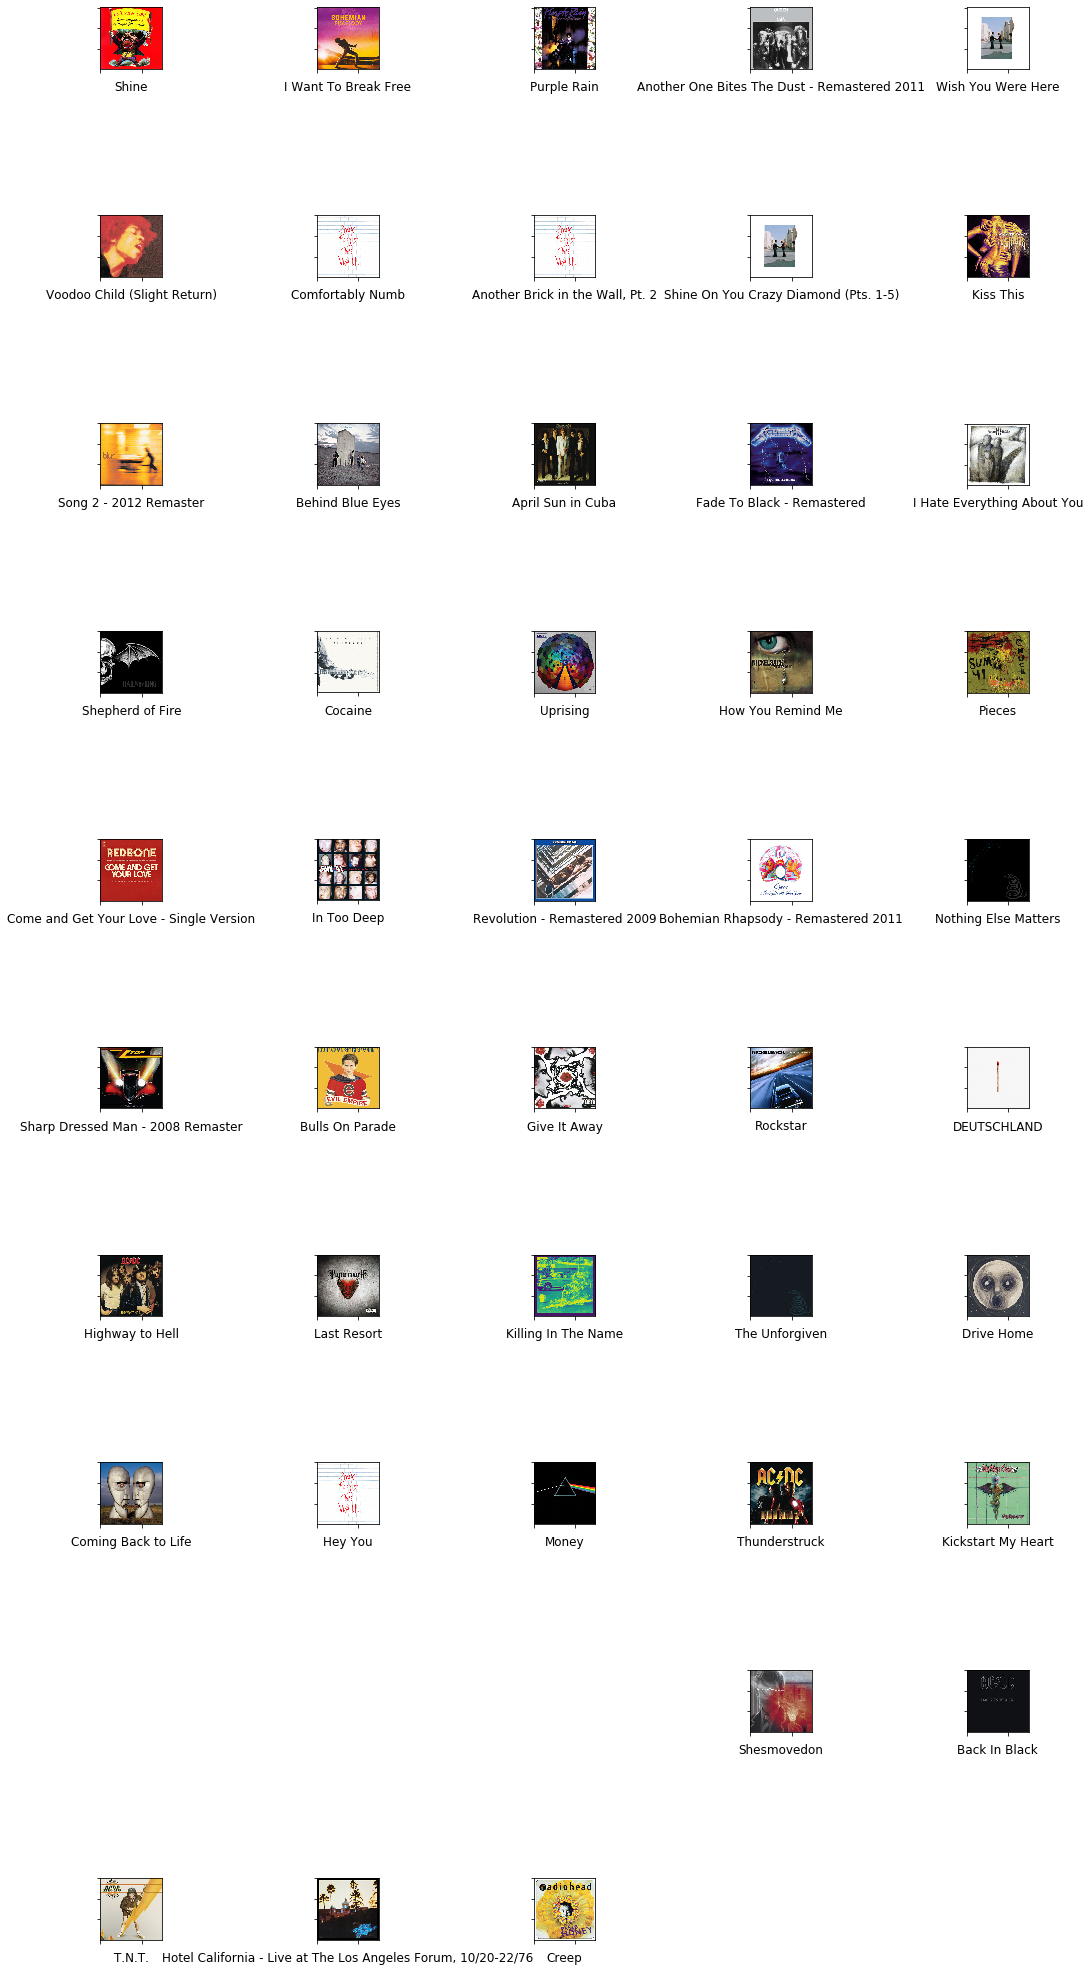

In [198]:
visualize_songs(playlist_Rock)

In [76]:
def generate_playlist_feature(complete_feature_set, playlist_df, weight_factor):
    """ 
    Summarize a user's playlist into a single vector

    Parameters: 
        complete_feature_set (pandas dataframe): Dataframe which includes all of the features for the spotify songs
        playlist_df (pandas dataframe): playlist dataframe
        weight_factor (float): float value that represents the recency bias. The larger the recency bias, the most priority recent songs get. Value should be close to 1. 
        
    Returns: 
        playlist_feature_set_weighted_final (pandas series): single feature that summarizes the playlist
        complete_feature_set_nonplaylist (pandas dataframe): 
    """
    
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1).mean(axis =0)
    complete_feature_set_playlist = complete_feature_set_playlist.merge(playlist_df[['id','date_added']], on = 'id', how = 'inner')
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1)
    
    playlist_feature_set = complete_feature_set_playlist.sort_values('date_added',ascending=False)

    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'months_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days / 30)
        
    playlist_feature_set['weight'] = playlist_feature_set['months_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    #print(playlist_feature_set_weighted.iloc[:,:-4].columns)
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-4].mul(playlist_feature_set_weighted.weight,0))
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-4]
    #playlist_feature_set_weighted_final['id'] = playlist_feature_set['id']
    
    return playlist_feature_set_weighted_final.sum(axis = 0), complete_feature_set_nonplaylist

In [77]:
complete_feature_set_playlist_vector_Rock, complete_feature_set_nonplaylist_Rock = generate_playlist_feature(complete_feature_set, playlist_Rock, 1.09)
#complete_feature_set_playlist_vector_chill, complete_feature_set_nonplaylist_chill = generate_playlist_feature(complete_feature_set, playlist_chill, 1.09)

In [78]:
complete_feature_set_playlist_vector_Rock.shape

(171,)

In [79]:
def generate_playlist_recos(df, features, nonplaylist_features):
    """ 
    Pull songs from a specific playlist.

    Parameters: 
        df (pandas dataframe): spotify dataframe
        features (pandas series): summarized playlist feature
        nonplaylist_features (pandas dataframe): feature set of songs that are not in the selected playlist
        
    Returns: 
        non_playlist_df_top_40: Top 40 recommendations for that playlist
    """
    
    non_playlist_df = df[df['song_uri'].isin(nonplaylist_features['id'].values)]
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim',ascending = False).head(40)
    non_playlist_df_top_40['url'] = non_playlist_df_top_40['song_uri'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return non_playlist_df_top_40

In [80]:
my_reco = generate_playlist_recos(full_df, complete_feature_set_playlist_vector_Rock, complete_feature_set_nonplaylist_Rock)

In [81]:
my_reco

,album_name,album_uri,artist_uri,song_name,song_uri,artist_name,artist_genres,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,release_date,popularity,popularity_red,sim,url
12,Shot In The Dark,1Rz3Q2PIhrCs21itNShUxB,711MCceyCBcFnzjGY4Q7Un,Shot In The Dark,6ZtrGCcn38kGImt2GPFbJB,AC/DC,"[australian rock, hard rock, rock]",0.599,0.787,1,0.0338,0.000021,0.000053,0.0640,114.065,185133,2020,65,13,0.648225,https://i.scdn.co/image/ab67616d00001e021f36a8...
9,"The Bandit / 100,000 People",37jVrA1CD7d55Ft12iASUr,2qk9voo8llSGYcZ6xrBzKx,The Bandit,55meRTYBw8S5q7KF3DkjL7,Kings of Leon,"[modern rock, rock]",0.394,0.833,1,0.0420,0.008630,0.811000,0.1090,145.082,250961,2021,70,14,0.590668,https://i.scdn.co/image/ab67616d00001e02d18426...
23,Echoing,6A2VAAC2N3GBc3UkSfJqaF,2qk9voo8llSGYcZ6xrBzKx,Echoing,7ab894xLywHmwswdr00QSr,Kings of Leon,"[modern rock, rock]",0.293,0.778,1,0.0340,0.014700,0.227000,0.1020,147.882,217347,2021,66,13,0.590327,https://i.scdn.co/image/ab67616d00001e023cda40...
14,No Son Of Mine,01i0x7uM52GS3UxHk1FLO6,7jy3rLJdDQY21OgRLCZ9sD,No Son Of Mine,2Un5sxsgnFBxiIDV0KdfMn,Foo Fighters,"[alternative metal, alternative rock, modern r...",0.535,0.972,1,0.0844,0.001310,0.000471,0.0788,124.971,208707,2021,64,12,0.524752,https://i.scdn.co/image/ab67616d00001e02e85088...
0,Medicine At Midnight,1FyNZvJ6MHO01kl3ySMPdc,7jy3rLJdDQY21OgRLCZ9sD,Making A Fire,2u8NmvhYX6wiviyxJTOhEi,Foo Fighters,"[alternative metal, alternative rock, modern r...",0.506,0.946,1,0.0652,0.000022,0.002260,0.0528,91.111,255107,2021,71,14,0.523440,https://i.scdn.co/image/ab67616d00001e02593dc7...
50,Trouble’s Coming,7HZqhu4pOZcTAv7ROHhZSj,2S5hlvw4CMtMGswFtfdK15,Trouble’s Coming,5eR6OS3joTAHJToyzehKfu,Royal Blood,"[brighton indie, garage rock, modern alternati...",0.775,0.688,0,0.0384,0.053300,0.000000,0.3210,112.009,228400,2020,69,13,0.506292,https://i.scdn.co/image/ab67616d00001e02fcaaab...
1,Typhoons,547UjN7nCN4L5rQgolzHQn,2S5hlvw4CMtMGswFtfdK15,Typhoons,6BsZx9FarJrLddTNu2k6pU,Royal Blood,"[brighton indie, garage rock, modern alternati...",0.601,0.723,0,0.0384,0.000347,0.001100,0.3460,114.991,236933,2021,68,13,0.503546,https://i.scdn.co/image/ab67616d00001e02d3422e...
63,acting like that (feat. Machine Gun Kelly),3RjX0PnYherdDTp2MWq0G1,6Ad91Jof8Niiw0lGLLi3NW,acting like that (feat. Machine Gun Kelly),6PxNpy8jOjyZ8aGCD58LpW,YUNGBLUD,"[british indie rock, modern rock, pop, rock]",0.522,0.900,0,0.0719,0.000070,0.000000,0.3000,160.010,191067,2020,74,14,0.499730,https://i.scdn.co/image/ab67616d00001e0269f261...
38,One + One,26hlgZxgnH55W56xx5W4Vt,18H0sAptzdwid08XGg1Lcj,One + One,2nY09ZRwI5cXRBB2JkJid7,Death From Above 1979,"[alternative dance, alternative rock, canadian...",0.508,0.797,1,0.1230,0.000457,0.053900,0.0950,149.969,226296,2021,56,11,0.494697,https://i.scdn.co/image/ab67616d00001e0226c05c...
36,Heat Above,7K0OZ8KfAFTPYxHFCXeE9r,4NpFxQe2UvRCAjto3JqlSl,Heat Above,6ceQochP5zXA4v2AC4bcMB,Greta Van Fleet,"[modern blues rock, modern hard rock, rock]",0.337,0.847,1,0.0459,0.008750,0.001140,0.1470,139.061,341255,2021,64,12,0.489365,https://i.scdn.co/image/ab67616d00001e027d6a64...


In [216]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_songs(df):
    """ 
    Visualize cover art of the songs in the inputted dataframe

    Parameters: 
        df (pandas dataframe): Playlist Dataframe
    """
    
    temp = df['url'].values
    plt.figure(figsize=(15,15))
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['song_name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

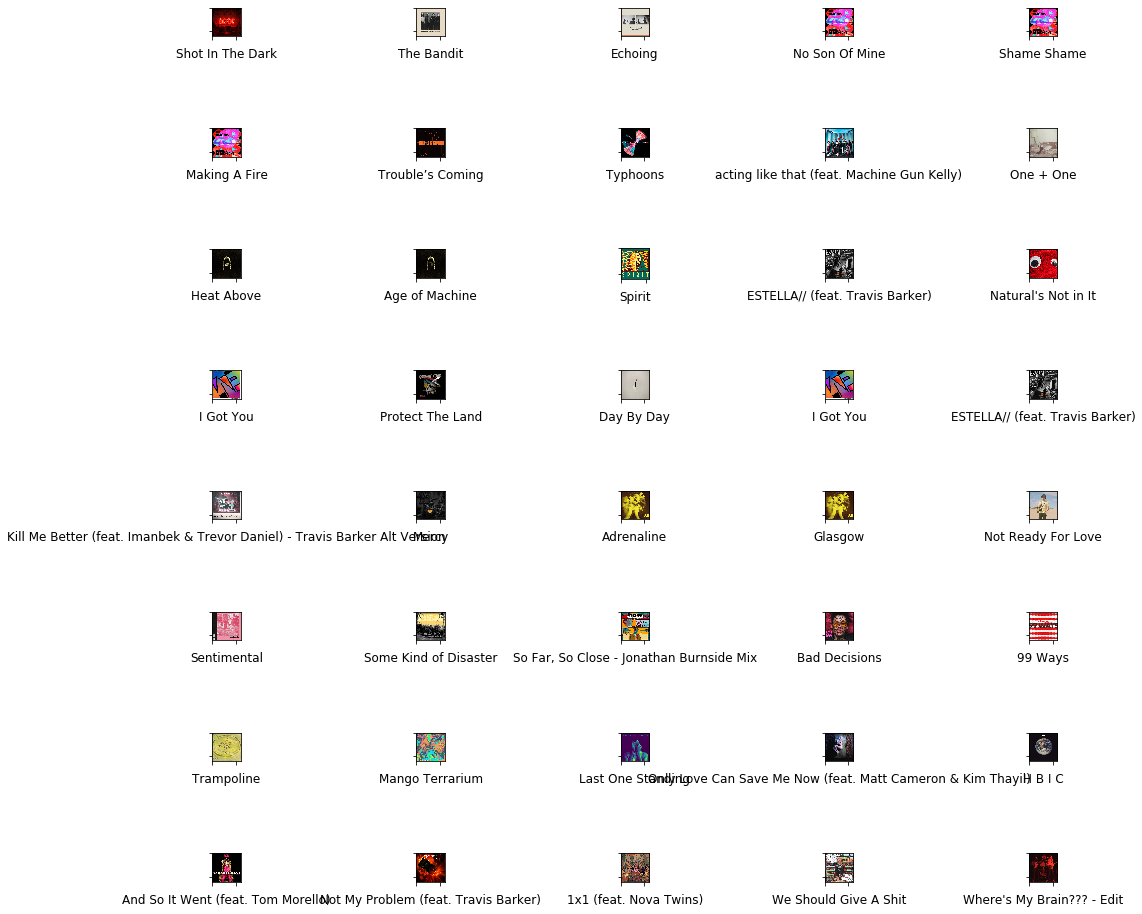

In [217]:
visualize_songs(my_reco)

In [ ]:
#############trying to pull spotify all genre

In [40]:
import requests
page = requests.get("https://www.prefixmag.com/news/1387-different-music-genres-discovered-spotify/203669/")
page.status_code

# A status_code of 200 means that the page downloaded successfully

200

In [41]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [55]:
x = soup.find_all('p')[9]

<p>1 pop<br/>
2 dance pop<br/>
3 pop rap<br/>
4 rap<br/>
5 tropical house<br/>
6 post-teen pop<br/>
7 rock<br/>
8 trap music<br/>
9 hip hop<br/>
10 southern hip hop<br/>
11 latin<br/>
12 pop rock<br/>
13 dwn trap<br/>
14 edm<br/>
15 neo mellow<br/>
16 alternative rock<br/>
17 r&amp;b<br/>
18 classic rock<br/>
19 latin pop<br/>
20 album rock<br/>
21 indie pop<br/>
22 alternative metal<br/>
23 indie rock<br/>
24 mellow gold<br/>
25 post-grunge<br/>
26 viral pop<br/>
27 hard rock<br/>
28 singer-songwriter<br/>
29 indie r&amp;b<br/>
30 pop punk<br/>
31 folk-pop<br/>
32 soft rock<br/>
33 tropical<br/>
34 reggaeton<br/>
35 indie folk<br/>
36 indietronica<br/>
37 electro house<br/>
38 nu metal<br/>
39 permanent wave<br/>
40 canadian pop<br/>
41 gangster rap<br/>
42 indie poptimism<br/>
43 urban contemporary<br/>
44 contemporary country<br/>
45 hip pop<br/>
46 country road<br/>
47 country<br/>
48 garage rock<br/>
49 folk rock<br/>
50 house<br/>
51 big room<br/>
52 latin hip hop<br/>
53 rap met

In [65]:
x.find_all('br')[1]

<br/>

In [100]:
my_list = []

for div in soup.find_all("div"):
    text_list = [text for text in div.stripped_strings]
    my_list.append(text_list)

In [120]:
all_geners = my_list[34][44:1560]
# all_geners[1300:]

In [132]:
all_genres_updated = []

for g in all_geners:
    up_gen = g.split(" ")[1:]
#     print(up_gen)
    if len(up_gen)>1:
        full = ""
        for part in up_gen:
            full = full+ " " +part
            
        full = full.lstrip()
        all_genres_updated.append(full)
    
    else:
        all_genres_updated.append(up_gen[0])


In [133]:
all_genres_updated

['pop',
 'dance pop',
 'pop rap',
 'rap',
 'tropical house',
 'post-teen pop',
 'rock',
 'trap music',
 'hip hop',
 'southern hip hop',
 'latin',
 'pop rock',
 'dwn trap',
 'edm',
 'neo mellow',
 'alternative rock',
 'r&b',
 'classic rock',
 'latin pop',
 'album rock',
 'indie pop',
 'alternative metal',
 'indie rock',
 'mellow gold',
 'post-grunge',
 'viral pop',
 'hard rock',
 'singer-songwriter',
 'indie r&b',
 'pop punk',
 'folk-pop',
 'soft rock',
 'tropical',
 'reggaeton',
 'indie folk',
 'indietronica',
 'electro house',
 'nu metal',
 'permanent wave',
 'canadian pop',
 'gangster rap',
 'indie poptimism',
 'urban contemporary',
 'contemporary country',
 'hip pop',
 'country road',
 'country',
 'garage rock',
 'folk rock',
 'house',
 'big room',
 'latin hip hop',
 'rap metal',
 'rock en espanol',
 'stomp and holler',
 'funk rock',
 'soul',
 'dirty south rap',
 'chamber pop',
 'grupera',
 'europop',
 'underground hip hop',
 'regional mexican',
 'modern country rock',
 'blues-rock'

In [134]:
a['artist_genres'][0]

['brighton indie',
 'garage rock',
 'modern alternative rock',
 'modern blues rock',
 'modern hard rock',
 'modern rock',
 'rock']

In [147]:
# np.where(all_genres_updated == 'pop')

# 'pop' in all_genres_updated

# all_genres_updated.index('modern blues rock')



########### FIN

In [82]:
# ohe_prep(a, 'release_date', 'release_date')

array(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'tempo'], dtype=object)

In [88]:
complete_feature_set

,genre|album,genre|alternative,genre|anthem,genre|auckland,genre|aussie,genre|australian,genre|blues,genre|brighton,genre|brisbane,genre|british,genre|bubblegrunge,genre|cafe,genre|canadian,genre|candy,genre|celtic,genre|christian,genre|dance,genre|edm,genre|electro,genre|emo,genre|future,genre|garage,genre|gothic,genre|grunge,genre|hard,genre|hardcore,genre|hip,genre|hop,genre|house,genre|indie,genre|indietronica,genre|kiwi,genre|mathcore,genre|media,genre|melodic,genre|metal,genre|metalcore,genre|minnesota,genre|modern,genre|neo,genre|neon,genre|new,genre|nu,genre|nz,genre|ohio,genre|on,genre|permanent,genre|perth,genre|pixie,genre|pop,genre|poptimism,genre|post,genre|progressive,genre|psych,genre|psychedelic,genre|punk,genre|rap,genre|rave,genre|rock,genre|screamo,genre|seattle,genre|shanty,genre|skate,genre|slayer,genre|social,genre|soul,genre|surf,genre|sydney,genre|tassie,genre|teen,genre|tropical,genre|uk,genre|wave,genre|windsor,genre|zolo,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,pop|3,pop|4,pop|5,pop|6,pop|7,pop|8,pop|9,pop|10,pop|11,pop|12,pop|13,pop|14,pop|15,year|2020,year|2021,id
0,0.000000,0.131386,0.0000,0.000000,0.000000,0.000000,0.208262,0.259432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166402,0.000000,0.00000,0.208262,0.000000,0.000000,0.000000,0.000000,0.141916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.591839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.656188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.144762,0.098662,0.011065,1.233697e-04,2.396514e-04,0.072189,0.079559,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,0.0,0.5,6BsZx9FarJrLddTNu2k6pU
1,0.000000,0.392185,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.36127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288178,0.000000,0.00000,0.220829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.36127,0.000000,0.000000,0.000000,0.000000,0.288178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.36127,0.000000,0.000000,0.114603,0.183939,0.035574,5.293213e-07,4.923747e-04,0.004911,0.035317,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.00,0.0,0.5,2u8NmvhYX6wiviyxJTOhEi
2,0.000000,0.000000,0.0000,0.000000,0.000000,0.524134,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319660,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.545241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.49837,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.053333,0.177055,0.022771,1.557717e-05,2.000000e-01,0.050620,0.148383,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.0,0.5,2KKyeOCbAKKJ9qk7Ycb7Wn
3,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277874,0.000000,0.244832,0.000000,0.857719,0.00000,0.0

In [89]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_songs(df):
    """ 
    Visualize cover art of the songs in the inputted dataframe

    Parameters: 
        df (pandas dataframe): Playlist Dataframe
    """
    
    temp = df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))))
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

In [ ]:
playlist_EDM = create_necessary_outputs('Rock', id_name,spotify_df)

MIGHT NEED TO EXPLODE BEFORE LOOKING FOR ARTIST GENRE 

In [154]:
# x = a['artist_uri'][0]

# artist_gnre = []
# for art in x:
#     gnre = sp.artist(art)['genres']
#     artist_gnre.append(gnre)
    
    
def get_artist_gnre(artist_uri):
    artist_gnre = []
    for art in artist_uri:
        gnre = sp.artist(art)['genres']
        artist_gnre.append(gnre)
    return artist_gnre
        
a['artist_gnre'] = a['artist_uri'].apply(lambda x : get_artist_gnre(x))

# get_artist_gnre(a['artist_uri'][0])

In [146]:
artist_gnre

[['modern rock', 'pop punk']]

In [32]:
a = sp.artist('0Upmz8QvuLAkKAfRlJYWTL') # can take out genre 
a['name']

'Split Enz'

In [32]:
x=sp.audio_features('0JJP0IS4w0fJx01EcrfkDe')
x

[{'danceability': 0.459,
  'energy': 0.895,
  'key': 2,
  'loudness': -3.126,
  'mode': 1,
  'speechiness': 0.0805,
  'acousticness': 0.00725,
  'instrumentalness': 0,
  'liveness': 0.206,
  'valence': 0.572,
  'tempo': 181.04,
  'type': 'audio_features',
  'id': '0JJP0IS4w0fJx01EcrfkDe',
  'uri': 'spotify:track:0JJP0IS4w0fJx01EcrfkDe',
  'track_href': 'https://api.spotify.com/v1/tracks/0JJP0IS4w0fJx01EcrfkDe',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0JJP0IS4w0fJx01EcrfkDe',
  'duration_ms': 182827,
  'time_signature': 4}]